
# Multivariate data visualization (continuation...)
After knowing the possible values of our variables, and their distribution, we can move forward to correlated  point 2: check how our variables are correlated.

## When looking into a dataset, we have different tasks in terms of visualizations:   
1. understand the set of possible values for each variable and identify typical distributions   
  - which values are more common,   
  - check for outliers, missing data,   
  - etc..  
2. **check how variables are correlated**
  - how distributions change when we fix a subset of variables, 
  - pairwise correlations,
  - **how values evolve overtime (if one variable is time!)**  
  - etc..  
3. support your business analysis and convey relevant messages in a compelling way!
  - show growth potential in a given market
  - show relations between markets.

## Again, the type of data is important:
- numerical vs numerical  
- numerical vs dates! (now we can talk about time series)    
- numerical vs categorical  
- categorical vs categorical  
- ...  

# Summary
In this lecture, in terms of **data visualization concepts** we will address:
1. how to rapidly extract insights from time series
2. how to check the lag with which we can forecast a time series

In this lecture in terms of **programming skills** we will see how to:  
1. Use datetime functions  
2. Use seaborn lineplots

In [4]:
from datetime import timedelta, datetime
time = "2021/05/11"
time_1 = datetime.strftime(time,"%Y/%m/%d")
#time_1 = time.strftime(time,"%Y/%m/%d")

TypeError: descriptor 'strftime' requires a 'datetime.date' object but received a 'str'

### Datetime objects
-- datetime objects represent time as a set of numbers, representing:  
 year, month, day, hour, minutes, seconds, microseconds!

-- we can add time intervals **timedelta** to datetime objects    

-- we can convert datetime objects to strings  

-- we can convert strings to datetime objects  

-- pandas already has some of these methods built-in

In [ ]:
current_time = datetime.today()
current_time

datetime.datetime(2021, 5, 3, 19, 33, 40, 349858)

In [ ]:
# we can add/Subtract timedeltas to a datetime object. 
# intervals can be weeks, days, hours,  minutes, seconds, milliseconds, microseconds
nice_day = current_time + timedelta(days=2)
nice_day

datetime.datetime(2021, 5, 5, 19, 33, 40, 349858)

In [ ]:
# date method returns just the day part
nice_day.date()

datetime.date(2021, 5, 5)

In [ ]:
# time method returns the part with the hour of the day
nice_day.time()

datetime.time(19, 33, 40, 349858)

In [ ]:
# the difference between two datetime objects is a timedelta

In [ ]:
time_since_start = datetime.today() - current_time  
time_since_start

datetime.timedelta(seconds=7, microseconds=972051)

In [ ]:
#we can convert a deltatime into a float using total_seconds
time_since_start.total_seconds()

7.972051

In [ ]:
#we can convert datetime objects into strings - using different formats
print('nice_day.strftime("%m/%d/%Y")', nice_day.strftime("%m/%d/%Y"))
print('nice_day.strftime("%m-%d-%Y")', nice_day.strftime("%m-%d-%Y"))
print('nice_day.strftime("%d-%m-%Y")', nice_day.strftime("%d-%m-%Y"))

nice_day.strftime("%m/%d/%Y") 05/05/2021
nice_day.strftime("%m-%d-%Y") 05-05-2021
nice_day.strftime("%d-%m-%Y") 05-05-2021


In [ ]:
# we can convert strings to datetime using different formats
print('datetime.strptime("20201113","%Y%m%d"):',datetime.strptime("20201113","%Y%m%d"))
print('datetime.strptime("2020-11-13 10:00","%Y-%m-%d %H:%M"):',datetime.strptime("2020-11-13 10:00","%Y-%m-%d %H:%M"))

datetime.strptime("20201113","%Y%m%d"): 2020-11-13 00:00:00
datetime.strptime("2020-11-13 10:00","%Y-%m-%d %H:%M"): 2020-11-13 10:00:00


### Try it yourself

In [ ]:
#convert the following strings to datetime 
time_str_1 = "2020/10/01"
time_str_2 = "28-10-2020_10:23"

In [ ]:
time_1 = datetime.strptime(time_str_1,"%Y/%m/%d")
time_2 = datetime.strptime(time_str_2,"%d-%m-%Y_%H:%M")

time_2

datetime.datetime(2020, 10, 28, 10, 23)

In [ ]:
# get the time difference between today and the day in time_str_2
delta = datetime.today()-time_2
delta

datetime.timedelta(days=187, seconds=33052, microseconds=470356)

In [ ]:
# add the difference to time in time_str_1 and convert to a string with the format "%Y%m%d"
new_time = delta + time_1
new_time.strftime("%Y%m%d")

'20210406'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os

# You have decided to make some investment, and thinking about how the energy market is a bit chaotic right now,
### you decided to check if there was some shift in value from oil to electric 

Dataset: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs  
symbols-company translation https://datahub.io/core/nasdaq-listings#data  
subset of companies we will use:  
-- **Lithium exploration**   
---- Jiangxi Ganfeng Lithium - not in the list  
---- Tianqi Lithium - not in the list  
---- Albermarle -- ALB -- alb.us.txt  
---- SQM -- SQM -- sqm.us.txt  
-- **Oil and Gas**  
---- Saudi Aramco -- SAR -- sar.us.txt  
---- Royal Dutch Shell -- RDSA/RDSB -- RDSA/RDSB -> rds-a.us.txt (we will forget rds-b.us.txt)  
---- China National Petroleum Corporation -- SNP -- snp.us.txt  
---- BP -- BP -- bp.us.txt   
-- **Batteries companies** 

---- BYD Company Ltd -- BYD -- byd.us.txt  
---- LG Chem -- LGCLF -- not in the list  
---- Many more  
---- Tesla -- TSLA -- tsla.us.txt   

## Load the main files and create a single dataset, casting all strings representing dates as dates

In [ ]:
data_folder = "lecture_5"
data_files = ["alb.us.txt", "sqm.us.txt", "sar.us.txt", "rds-a.us.txt", "snp.us.txt", "byd.us.txt", "tsla.us.txt"]
companies = ["Albermarle", "SQM", "Aramco", "Shell", "CNPC", "BYD", "Tesla"]
segment = ["Lithium", "Lithium", "OilAndGas", "OilAndGas","OilAndGas", "Batteries","Batteries"]

In [ ]:
#Retrieve data and construct a "long" dataframe
collect_dataframe = []
for i in range(len(companies)):
    dataframe_1 = pd.read_csv(os.path.join(data_folder,data_files[i]))
    dataframe_1["company"] = companies[i]
    dataframe_1["segment"] = segment[i]
    collect_dataframe += [dataframe_1]
df_stock = pd.concat(collect_dataframe).reset_index()
df_stock.drop("index", axis="columns", inplace=True)

In [ ]:
#pandas already has a set of tools to handle directly dates
# you should convert your dates and time variables using to_datetime, or the datetime package
df_stock["Date"]=pd.to_datetime(df_stock["Date"])

In [ ]:
df_stock.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt,company,segment
0,2005-02-25,16.838,17.252,16.776,17.243,918662,0,Albermarle,Lithium
1,2005-02-28,17.233,17.272,16.948,17.100,777776,0,Albermarle,Lithium
2,2005-03-01,17.118,17.423,17.118,17.281,415110,0,Albermarle,Lithium
3,2005-03-02,17.118,17.406,17.036,17.181,417997,0,Albermarle,Lithium
4,2005-03-03,17.233,17.388,17.118,17.198,294221,0,Albermarle,Lithium
5,2005-03-04,17.233,17.596,17.189,17.506,283778,0,Albermarle,Lithium
6,2005-03-07,17.532,17.569,17.281,17.353,188217,0,Albermarle,Lithium
7,2005-03-08,17.327,17.441,17.100,17.388,470444,0,Albermarle,Lithium
8,2005-03-09,17.327,17.540,17.019,17.028,703330,0,Albermarle,Lithium
9,2005-03-10,17.028,17.163,16.828,16.975,368664,0,Albermarle,Lithium


### The first think we want to see is if there has been any increase in stock value

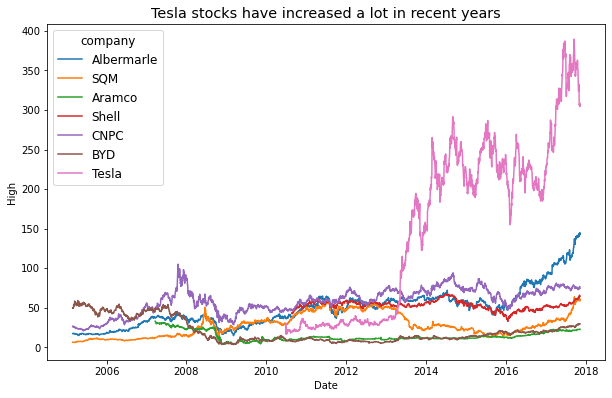

In [ ]:
fig,ax = plt.subplots(figsize= (10,10*0.618))
plt.rcParams["font.size"] = 12
plt.rcParams["font.size"] = 12
lp = sns.lineplot(data=df_stock, x="Date", y="High", hue="company", ax=ax);
plt.title("Tesla stocks have increased a lot in recent years");

### Is this plot useful?
**Yes:**  
-- We can see that the markets have been more or less stable for most companies, except for 2  (Tesla and Albermarle)  
**No:**  
-- We have no idea on who is who: the colors are not enough to distinguish,

In [ ]:
# get the last day in the dataset
last_day = [df_stock[df_stock["company"]==comp]["Date"].max() for comp in companies]
last_day_values = [df_stock[(df_stock["Date"]==last_day[i]) & (df_stock["company"]==companies[i]) ] for i in range(len(companies))]

Text(10873   2017-01-14
Name: Date, dtype: datetime64[ns], 10873    64.38
Name: High, dtype: float64, 'Shell')

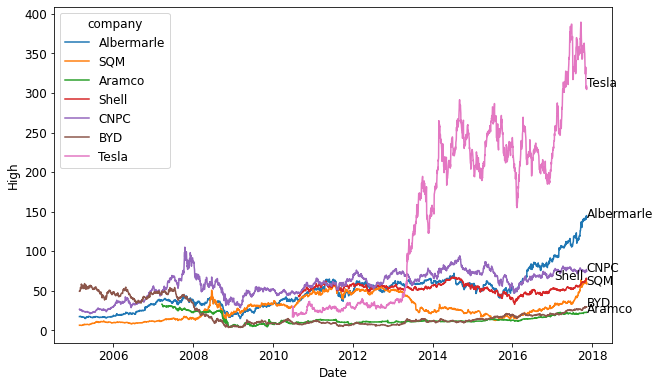

In [ ]:
fig,ax = plt.subplots(figsize= (10,10*0.618))
lp = sns.lineplot(data=df_stock, x="Date", y="High", hue="company", ax=ax);
# add text to each line, but exclude Shell -- 
#    its High value on the last day in the dataset is to close to others 
[plt.text(last_day_values[i]["Date"],last_day_values[i]["High"], companies[i]) if companies[i]!="Shell" else None for i in range(len(companies))];
# add Shell
plt.text(last_day_values[3]["Date"] - timedelta(days=30*10),last_day_values[3]["High"], companies[3])

### Important aspects of the representation
Add the names directly to the plots when you have a large number of time-series in the same graphic.  
An x-axis is a date-time object  
-- until now, we have seen data that is unordered. We had to force an order so that the plots were informative   
-- now we have a natural order: time 

### Programming notes: 
datetime library is your best option for handling time variables in python  
-- You can convert strings to dates using ```pd.to_datetime(df_stock["Date"])```  
-- You can add and subtract time intervals to a date  ```datetime.timeintervals(days=X)```  

Use os.path to form paths to files in your system: ```os.path.join(data_folder,data_files[i])```  
-- avoid concatenating strings and adding / or \ as they may not be compatible accross operative systems!

### try it yourself
1 - dates  
1.1 - get the day when Albermarle has the lowest High value  
1.2 - add 4 days and convert the value to a string, using datetime.datetime.strptime

2 - plot the time series again, but add the text but now close to the first day in the data for each company

In [ ]:
#1 -- get the stock time series for Albermarle using df_stock["company"]=="Albermarle"
df_stock_alber = df_stock[df_stock["company"] == "Albermarle"]
#  -- get the line with the minimum value in column "High"
low_value = df_stock_alber["High"].idxmin()
print("low_value:", low_value)
#  -- get the line with this value
low_line = df_stock_alber.loc[low_value]
print("low_line:\n", low_line)
#  -- get the respective time
min_date = low_line["Date"]
print("min_date:", min_date)
#  -- subtract four days using timedelta(days=)
less_four_days = min_date-timedelta(days=4)
print("after subtracting:",less_four_days)
#  -- convert back to string using .strptime
day_as_string = less_four_days.strftime("%Y-%m-%d")
print("day_as_string:",day_as_string)

low_value: 1013
low_line:
 Date       2009-03-06 00:00:00
Open                    14.436
High                    14.715
Low                     13.987
Close                   14.554
Volume                 1294247
OpenInt                      0
company             Albermarle
segment                Lithium
Name: 1013, dtype: object
min_date: 2009-03-06 00:00:00
after subtracting: 2009-03-02 00:00:00
day_as_string: 2009-03-02


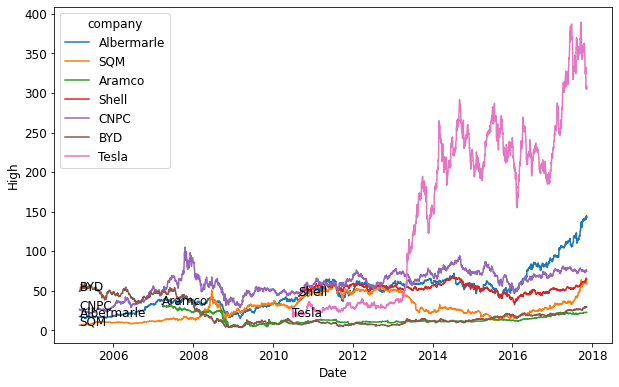

In [ ]:
# 2 - get the values for the first day of each company
#remember that we used this
#last_day = [df_stock[df_stock["company"]==comp]["Date"].max() for comp in companies]
#last_day_values = [df_stock[(df_stock["Date"]==last_day[i]) & (df_stock["company"]==companies[i]) ] for i in range(len(companies))]
#to compute the values on the last day
#   -- plot using lineplot from seabornd
#   -- add text to the start
### - Question? how many of these are now a mess?

first_day = [df_stock[df_stock["company"]==comp]["Date"].min() for comp in companies]
first_day_values = [df_stock[(df_stock["Date"]==first_day[i]) & (df_stock["company"]==companies[i]) ] for i in range(len(companies))]

fig,ax = plt.subplots(figsize= (10,10*0.618))
lp = sns.lineplot(data=df_stock, x="Date", y="High", hue="company", ax=ax);
[plt.text(first_day_values[i]["Date"],first_day_values[i]["High"], companies[i]) for i in range(len(companies))];

### We can represent expected value ranges if we group the data over some time windows, e.g., weeks
- we focus on the year 2013, and create a new column with the week of the year
- we then redo the above plot, but using the week number as x label
- the expecte range is computed by seaborn - it shows the mean and 95% confidence interval:deviation

In [ ]:
df_stock["week"]=df_stock["Date"].dt.isocalendar().week*1.
df_stock["year"]=df_stock["Date"].dt.isocalendar().year 

In [ ]:
to_plot =  df_stock[(df_stock["company"]=="Tesla") & (df_stock["year"]==2013)][["week","Date","Close","company"]]

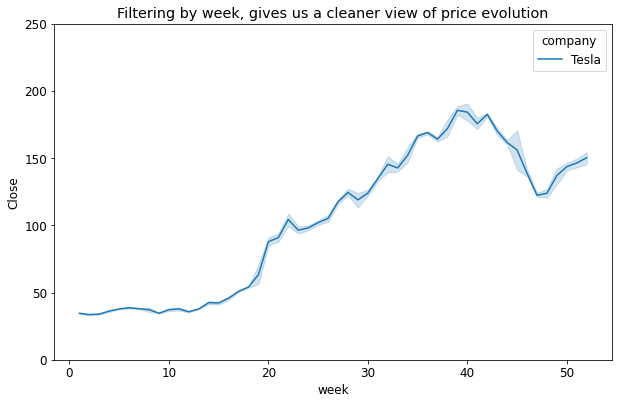

In [ ]:
fig,ax = plt.subplots(figsize= (10,10*0.618))
lp = sns.lineplot(data = to_plot, 
                     x = "week", 
                     y = "Close",
                     hue = "company",
                     ax=ax);
ax.set_ylim(0.0,250)
ax.set_title("Filtering by week, gives us a cleaner view of price evolution");

### Try it yourself: 
    - repeat for Ambermale

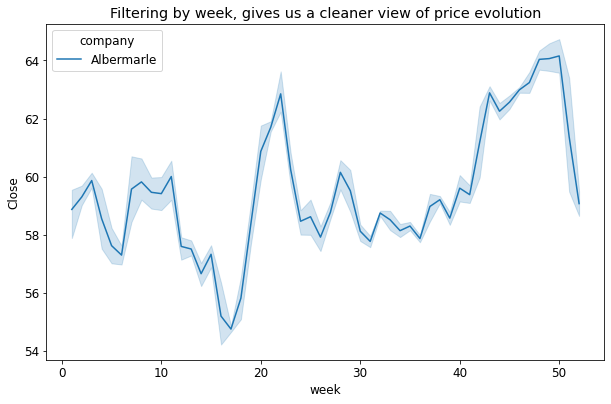

In [ ]:
# filter for company and albermarle
to_plot =  df_stock[(df_stock["company"]=="Albermarle") & (df_stock["year"]==2013)][["week","Date","Close","company"]]
# initialize the figure, setting its size
fig,ax = plt.subplots(figsize= (10,10*0.618))
# plot and add a title
lp = sns.lineplot(data = to_plot, 
                     x = "week", 
                     y = "Close",
                     hue = "company",
                     ax=ax);
ax.set_title("Filtering by week, gives us a cleaner view of price evolution");

In [ ]:
# we will focus only on the closing value from now on
df_stock_close = df_stock[["Date","Close","company"]].pivot(index="Date", columns="company", values="Close")

### It seams that both Tesla (batteries) and Albermarle are doing ok!
Lets check if there is any strong relation between the two
- first plot the values of both stocks for the same day one as x and the other as y

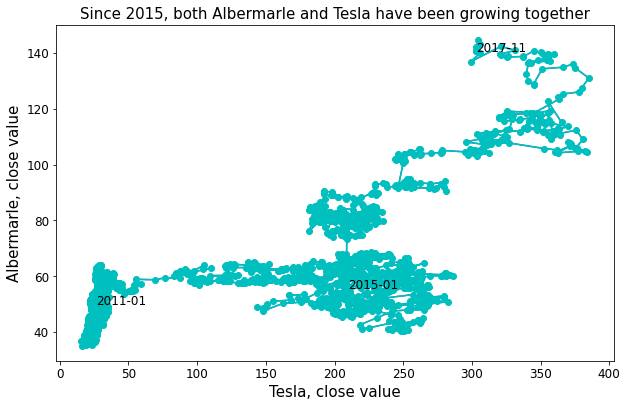

In [ ]:
# initialize the figure, and its size
fig,ax = plt.subplots(figsize=(10,10*0.618))
# plot one stock value vs the other, using blue lines
ax.plot(df_stock_close["Tesla"], df_stock_close["Albermarle"],label="Tesla vs Albermarle"
        )
# plot one stock value vs the other, using blue (cyan) circles:
#   color="c" -> c is the color cyan, marker="." is the circle. 
#   we define the circle size using markersize
ax.plot(df_stock_close["Tesla"], 
         df_stock_close["Albermarle"],color="c", marker=".", markersize=12, label="Tesla vs Albermarle")
ax.set_ylabel("Albermarle, close value", fontsize=15)
ax.set_xlabel("Tesla, close value", fontsize=15)
# annotate -> an alternative
# note that here we are using loc to access the line in the dataframe directly. 
[ax.annotate(date[:7],
            xy=(df_stock_close.loc[pd.to_datetime(date)]["Tesla"], 
               df_stock_close.loc[pd.to_datetime(date)]["Albermarle"]), 
              xycoords='data',  fontsize=12) for date in ["2011-01-04", "2015-01-05", "2017-11-10"] ];

ax.set_title("Since 2015, both Albermarle and Tesla have been growing together" ,fontsize=15);

### Important aspects of the plot
When plotting two variables against each other and using time one as a map, you must also provide information on time values.   
-- In this case, we have added the dates representing relevant moments in the data evolution  
-- This would be true for any other variable used as a map.

If we do not add extra information, we would not be able to understand the time flow in the graphic.

### Try it your self
-- compare Shell and Tesla

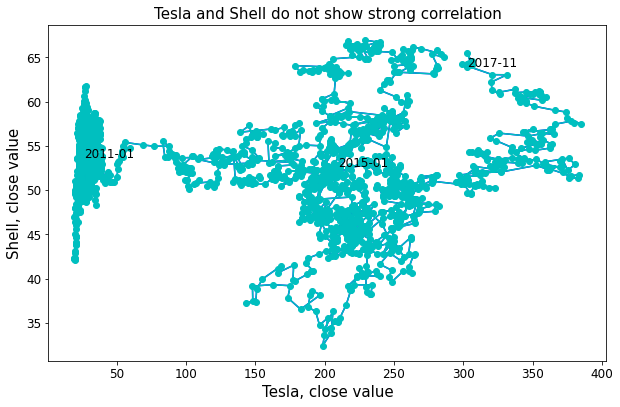

In [ ]:
# initialize the figure, and its size
fig,ax = plt.subplots(figsize=(10,10*0.618))
# plot the line
ax.plot(df_stock_close["Tesla"], df_stock_close["Shell"],color="b",label="Tesla vs Shell")
# plot the line
ax.plot(df_stock_close["Tesla"], 
         df_stock_close["Shell"],color="c",marker=".", markersize=12,label="Tesla vs Shell")
# plot the other elements in the plot
plt.title("Tesla and Shell do not show strong correlation" ,fontsize=15)
ax.set_ylabel("Shell, close value", fontsize=15)
ax.set_xlabel("Tesla, close value", fontsize=15)
# note that here we are using loc to access the line in the dataframe directly. 
[plt.gca().annotate(date[:7],
            xy=(df_stock_close.loc[pd.to_datetime(date)]["Tesla"], 
               df_stock_close.loc[pd.to_datetime(date)]["Shell"]), 
              xycoords='data',  fontsize=12) for date in ["2011-01-04", "2015-01-05", "2017-11-10"] ];

## You are now convinced - you want to invest in Tesla
- We first check if we can actually predict the stock value, or if it is random
- Then we check what are its expected value changes in a short time frame

### if a variable is purely random, it has no correlation with its past self
We can check if this is true in two ways:  
**1 - plot the Tesla stock against itself, but with some lag between the x and y:**  
x -- Tesla Stock Value at (t)  
y -- Tesla Stock Value at (t+lag)  
If the points end up in the x=y line, then they are strongly correlated   

To introduce this lag, we create a copy of the original dataframe, and remove the first rows in the copy  
**Example:**  
If we have an array: 
x = \[1,2,3,4,5\]  
and we want a shifted version of x by 2
y = \[3,4,5\]  
we just have to do: x\[2:\] -> this gives us a slice of the original array  
as we want to plot one against the other, we must also remove two elements to x: 
x\[:-2\]

In [ ]:
x = [1, 2, 3, 4, 5]
y = x[2:]
x_new = x[:-2]
print("y=x[2:]:",y)
print("x_new=x[:-2]:",x_new)

y=x[2:]: [3, 4, 5]
x_new=x[:-2]: [1, 2, 3]


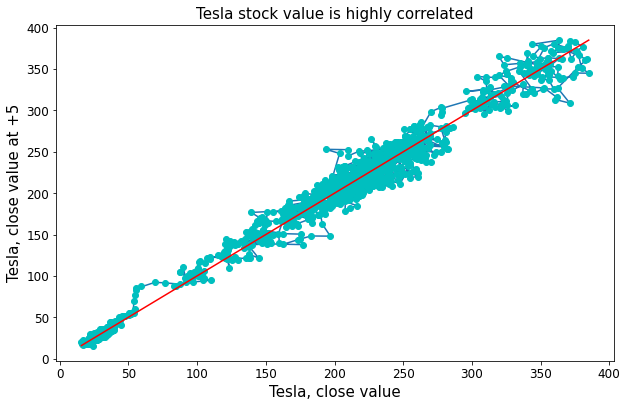

In [ ]:
# 1 plot the Tesla stock against itself, but with some lag between the x and y
# initialize figure and axis
fig,ax = plt.subplots(figsize=(10,10*0.618))
# define the lag for this experiment
lag = 5
# introduce a lag = 5 by removing the first 5 elements in the pandas dataframe that we use in y: 
###  --> this is what we do here: df_stock_close["Tesla"][lag:]
# set the dataframe in x to be of the same size by removing the last lag lines:
###  --> as we do df_stock_close["Tesla"][:-lag]
ax.plot(df_stock_close["Tesla"][:-lag], df_stock_close["Tesla"][lag:],label="Tesla vs Tesla")
ax.plot(df_stock_close["Tesla"][:-lag], 
         df_stock_close["Tesla"][lag:],"c.", markersize=12,label="Tesla vs Tesla") # note that I used the short version "c.", instead of color="c", marker="."
ax.set_ylabel(f"Tesla, close value at +{lag}", fontsize=15)
ax.set_xlabel("Tesla, close value", fontsize=15)
ax.set_title("Tesla stock value is highly correlated" ,fontsize=15);
# draw the x=y line
plt.plot([df_stock_close["Tesla"].min(), df_stock_close["Tesla"].max()], 
        [df_stock_close["Tesla"].min(), df_stock_close["Tesla"].max()],"r")

### Try it yourself:
- introduce a plot the following array against itself with a lag of 2: x = np.array(\[1,3,9,6,8,4\])
- play a bit with the lag above in the Tesla plot. Check when do you think you have lost predictive power

Text(0.5, 1.0, 'The data is most probably random')

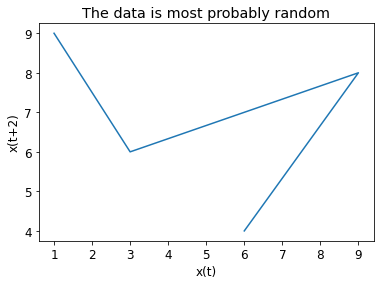

In [ ]:
x = np.array([1,3,9,6,8,4])
y= x[2:]
x_new = x[:-2]
plt.plot(x_new, y)
plt.xlabel("x(t)")
plt.ylabel("x(t+2)")
plt.title("The data is most probably random")

### An autocorrelation plot, gives us the result of the correlation for each possible lag
Furthermore, it also gives us an estimation of the how confident can we be that the same correlation is not the result of a random experiment

In [ ]:
from statsmodels.graphics import tsaplots

In [ ]:
df_stock_close["Tesla"].dropna()

Date
2010-06-28     17.00
2010-06-29     23.89
2010-06-30     23.83
2010-07-01     21.96
2010-07-02     19.20
               ...  
2017-11-06    302.78
2017-11-07    306.05
2017-11-08    304.31
2017-11-09    302.99
2017-11-10    302.99
Name: Tesla, Length: 1858, dtype: float64

In [ ]:
df_stock_close.index = pd.DatetimeIndex(df_stock_close.index).to_period('D')

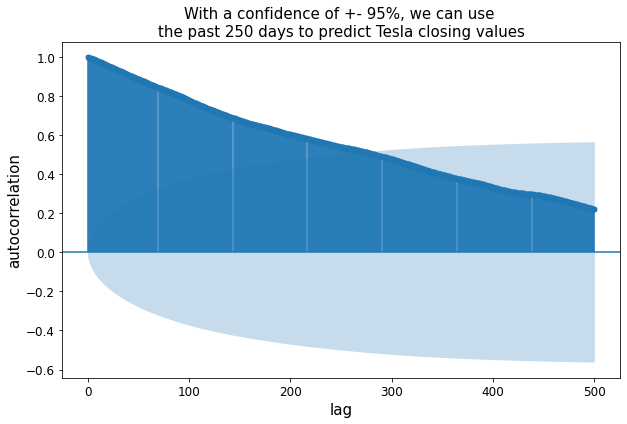

In [ ]:
fig= tsaplots.plot_acf(df_stock_close["Tesla"].dropna(),lags=500, alpha=0.2);
plt.xlabel("lag",fontsize=15)
plt.ylabel("autocorrelation" ,fontsize=15)
plt.title("With a confidence of +- 95%, we can use \nthe past 250 days to predict Tesla closing values",fontsize=15)
fig.set_figwidth(10)
fig.set_figheight(10*0.618)

### Important aspects of the representation
Autocorrelation plots are a commonly used tool for checking randomness in a data set.   
-- And if the dataset is not random, then we can try to predict future values!  


It corresponds to computing the correlation of a signal with itself, but then shifting it by different lags  
original signal: [1 2 3 1 2 3]   
shifted lag 1  : [2 3 1 2 3 1]   
shifted lag 2  : [3 1 2 3 1 2]   
autocorr(lag=1)=corr(original signal, shifted lag 1)  
autocorr(lag=2)=corr(original signal, shifted lag 2)  

In the above figure, the dark blue area corresponds to these correlations.   
The light blue area corresponds to the null hypothesis interval that the signal is random for a given confidence level. 
I.e., only correlations above this value negate the null hypothesis. In our case, onde values until 200.  
-- **We cannot say with a confidence of 95% that the value of TESLA stock on the day t depends on the value on day t-250**

### Try it your self - repeat for Albermarle

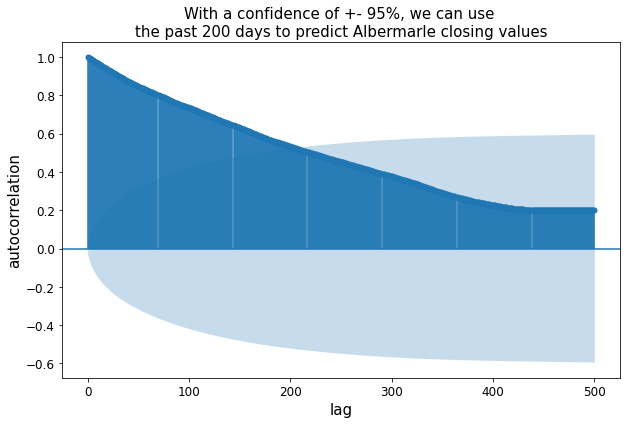

In [ ]:
fig= tsaplots.plot_acf(df_stock_close["Albermarle"].dropna(),lags=500, alpha=0.05);
plt.xlabel("lag",fontsize=15)
plt.ylabel("autocorrelation" ,fontsize=15)
plt.title("With a confidence of +- 95%, we can use \nthe past 200 days to predict Albermarle closing values",fontsize=15)
fig.set_figwidth(10)
fig.set_figheight(10*0.618)

# Representing Network Graphs (Networkx)

## what is a network graph
A network graph is a set of objects/entities that are connected by pairwise relations  
Examples: 
- cities and railroads
- actors and movies
- power grid
- internet (physical infrastructure)
- websites (links are edges!)

The objects/entities are called **nodes** or **vertices** (depends on the community) and the connections are called **edges**.

Network graphs are either directed or undirected. In directed graphs, each edge is not just connecting two nodes. It is establishing a relation/order between the two - edges have directions! Thus edges in directed graphs are always either **out edge** of one node and an **in edge** of the other node.  In undirected graphs, there is no direction.

As graphs represent topologies (who is neighbor of who) - they do not necessarily have coordinates associated with the objects/entities.  

Thus, when we want to represent a network, we can choose coordinates that best fit some tasks. Many algorithms specifically highlight some aspects of different graphs.

Also, when we are analyzing a graph, we are often interested in checking how individual nodes or edges contribute to the whole structure. The most common characteristics are:
- The number of edges connected to each node -> the degree of the node
    - networks that have each node connecting directly to a large number of other nodes are tightly connected, and transversing the whole graph is very simple;
    - In networks where each node connects to just one or two nodes are very sparse, and transversing the graph takes longer.
- How relevant to the graph structure is each node/edge, in the sense of how well connected the graph would be if we removed the edge/node
    - there are different metrics for this, namely the in-betweenness: how often do we need to go through a node or edge when we follow the shortest path between two other nodes in the graph 
    - nodes/edges that have a high betweenness in a graph are not necessarily the ones with more connections: the Medici family in Florentine(http://assets.press.princeton.edu/chapters/s8767.pdf)
    
As with DateTime objects, we need specific structures that make it easy to perform typical tasks in graphs. Some examples of such tasks are adding a new node/edge, determining the shortest path between two nodes, etc. 

## There are different libraries for network graphs
The default library for graphs in python is NetworkX.  It is very user friendly, but the plots are quite childish.  https://networkx.org/  
We will use this library in this notebook.


# Summary:
- Network Graphs fundamentals
    - Instantiating a graph
    - Simple visualization
    - Adding properties to nodes
    - Representing degree of nodes and in-betweenness
- Network Graph representations
    - Minimizing overlap between nodes and edges
    - Maximizing centrality perspective 

## Different types of representations of network graphs
We are mostly interested in varibles such as:
1. degree of each node - the number of edges it has
2. betweeness of each edge - for each node, how many shortest paths can we create that pass through it 

In [ ]:
import networkx.algorithms as gc
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

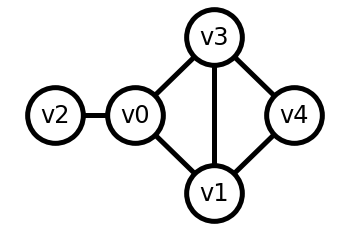

In [ ]:
#example with a un undirected graph
#create a graph
g = nx.Graph(directed=False)
# add vertices to the graph, and set the label
g.add_node("v0")
g.add_node("v1")
g.add_node("v2")
g.add_node("v3")
g.add_node("v4")
# add edges to the graph
g.add_edge("v0", "v1")
g.add_edge("v0", "v2")
g.add_edge("v0", "v3")
g.add_edge("v1", "v3")
g.add_edge("v1", "v4")
g.add_edge("v3", "v4");

# we can now set the coordinate values for each vertex
# in NetworkX, we assign properties to nodes using dictionaries
v_coord=dict()
v_coord["v0"] = (0,0)
v_coord["v1"] = (1,-0.5)
v_coord["v2"] = (-1,0)
v_coord["v3"] = (1,0.5)
v_coord["v4"] = (2,0)

# we plot everything
nx.draw_networkx(g, pos = v_coord, # the first argument is the graph, the second are the coordinates
                 font_size = 24,
                 node_size = 3100,
                 node_color = "white",
                 edgecolors = "black",
                 linewidths = 5,
                 width = 5);

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

### Try it yourself:
1. Add a new vertex to the graph, v5  
    1.1 connected it to node 3 and 4   
    1.2 set it with coordinates [2,1.5]  
    1.3 plot again  

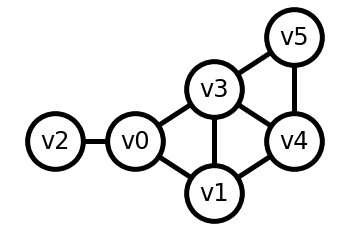

In [ ]:
# add a new vertex
g.add_node("v5")
# add two edges
g.add_edge("v3", "v5")
g.add_edge("v4", "v5");
# add coordinates
v_coord["v5"] = (2,1.)
# plot again
nx.draw_networkx(g,pos = v_coord,
                 font_size = 24,
                 node_size = 3100,
                 node_color = "white",
                 edgecolors = "black",
                 linewidths = 5,
                 width = 5);
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Adding the vertices name to the plot
Usually, our nodes have other properties, besides the name or the label, and we want to represent in instead of labels.  

In [ ]:
v_name = dict()
v_name["v0"] = "First"
v_name["v1"] = "Second"
v_name["v2"] = "Third"
v_name["v3"] = "Forth"
v_name["v4"] = "Fifth"
v_name["v5"] = "Sixth"

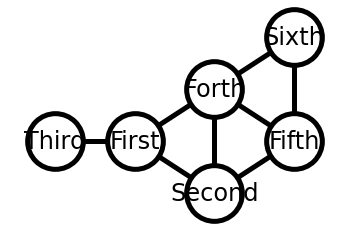

In [ ]:
nx.set_node_attributes(g, v_name, "v_name")
nx.draw_networkx(g,pos = v_coord, labels = v_name, # the text that appears next to the node is set with the key word labels
                 font_size = 24,
                 node_size = 3100,
                 node_color = "white",
                 edgecolors = "black",
                 linewidths = 5,
                 width = 5);
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

### Terrible Idea!! - the sizes are all wrong now! It is worse than a bubble plot!!!
When we have lots of text, we want to place it outside the nodes and we need tight control over the position.  
To better handle label options - NetworkX has a specific drawing function: nx.draw_networkx_labels, where we can set the labels coordinates, fontsize, etc..

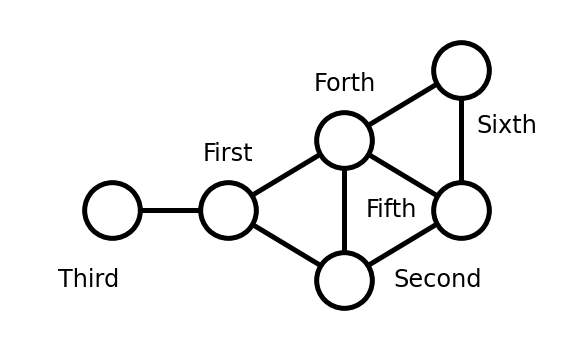

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10*0.618))
# in the above we had vertex_text = v_name, now we have vprops={"text":v_name}
text_pos_dict= {"text":v_name, "text_position":3*np.pi/2, "text_offset":[-0.1,0.25], "font_size":20}
# we can now set the coordinate values for each vertex
l_coord=dict()
l_coord["v0"] = (-0,.4)
l_coord["v1"] = (1.8,-0.5)
l_coord["v2"] = (-1.2,-0.5)
l_coord["v3"] = (1.,.9)
l_coord["v4"] = (1.4,0)
l_coord["v5"] = (2.4,.6)
options = {
    
}
l_options = {"font_size": 24}
nx.draw_networkx(g, v_coord,with_labels=False,
                 node_size = 3100,
                 node_color = "white",
                 edgecolors = "black",
                 linewidths = 5,
                 width = 5,
                 )
nx.draw_networkx_labels(g, l_coord, v_name, font_size = 24)
ax = plt.gca()
ax.margins(0.30)
plt.axis("off")
plt.show()

## Computing and representing relevant metrics
### Degree: number of edges in each node
In the above example, the degree of each edge is:
- v0 (First) -> 3
- v1 (Second)-> 3
- v2 (Third)-> 1
- v3 (Forth)-> 4
- v4 (Fifth)-> 3
- v5 (Sixth)-> 2

And v3 is the most well connected edge!

In [ ]:
#In the above example, we can see that the degree each node using out_degree()
print(f" The degree of node First is {g.degree['v0']} and the degree of Forth is: {g.degree['v3']}")

 The degree of node First is 3 and the degree of Forth is: 4


In [ ]:
# You can compute the degree for all nodes is NodeView object, which are similar to objects
deg = g.degree
deg

DegreeView({'v0': 3, 'v1': 3, 'v2': 1, 'v3': 4, 'v4': 3, 'v5': 2})

### Edge betweenness
As for edges, we have the v0 - v2 edge ( connecting Third to First) that is in 5 shortest paths.  
The second most relevant is First to Forth that has all the shortest paths between Forth and Sixth to First and Third.  
So I will venture that these are the two most relevant edges in the graph!

In [ ]:
# the edge betweeness is computed using the graph-tool centrality module - gc - and the function betweenness
# the function returns the betweenness for both vertices and edges.
ebet = nx.edge_betweenness_centrality(g)
# to access the property of an edge connecting vertex v0 and v1, you need to first get the egde 
print(f"The betweenness of edge connectiong First and Second is {ebet['v0','v1']:0.2f}")
print(f"The betweenness of edge connectiong First and Third is {ebet['v0','v2']:0.2f}")
print(f"The betweenness of edge connectiong First and Forth is {ebet['v0','v3']:0.2f}")

The betweenness of edge connectiong First and Second is 0.20
The betweenness of edge connectiong First and Third is 0.33
The betweenness of edge connectiong First and Forth is 0.33


In [ ]:
# more notes on properties: you can check all the properties by using
ebet

{('v0', 'v1'): 0.2,
 ('v0', 'v2'): 0.3333333333333333,
 ('v0', 'v3'): 0.3333333333333333,
 ('v1', 'v3'): 0.1,
 ('v1', 'v4'): 0.16666666666666666,
 ('v3', 'v4'): 0.13333333333333333,
 ('v3', 'v5'): 0.23333333333333334,
 ('v4', 'v5'): 0.1}

### Representing all in the graph
We want to represent the degree as color and size of each node: we use node_color and node_size  
We want to represent the edge betweened as color and size of each edge: we use edge_color and edge_size
We can use draw_networkx_edges to set edge properties

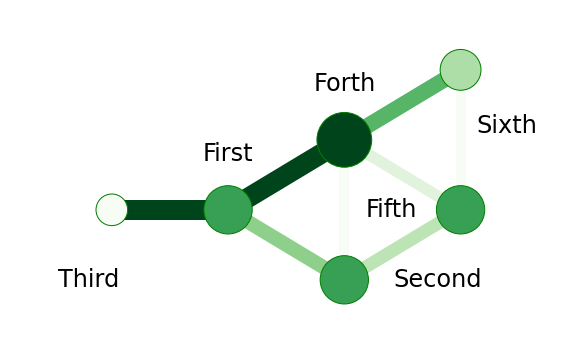

In [ ]:
fig, ax = plt.subplots(figsize=(10,10*0.618))
# First we need to normalize the degree
deg_1 =  [ deg[v] for v in g]
min_final = 1000
max_final = 3000
min_initial = np.min(deg_1)
max_initial = np.max(deg_1)
range_values_initial = max_initial-min_initial
range_values_final = max_final-min_final
deg_2 = (deg_1-min_initial)*range_values_final/range_values_initial + min_final

# then we set the degree as the color and size of nodes
# by reusing the dictionary we have created before for text
vprops_dict = {"node_size":deg_1*1000, "node_color":deg_1}
vprops_dict.update(text_pos_dict)

#in betweeness of an edge
ed = nx.edge_betweenness_centrality(g)
# normalization
ebet = [ed[v]*60 for v in g.edges]
min_final = 10
max_final = 20
min_initial = np.min(ebet)
max_initial = np.max(ebet)
range_values_initial = max_initial-min_initial
range_values_final = max_final-min_final
ebet_1 = (ebet-min_initial)*range_values_final/range_values_initial + min_final


nx.draw_networkx(g, with_labels=False, pos=v_coord, node_size = deg_2, node_color = deg_1, 
                 cmap=plt.cm.Greens, edgecolors = "green",  width = 5, ax=ax)
nx.draw_networkx_labels(g, l_coord, v_name,**l_options, ax=ax)
nx.draw_networkx_edges(g, pos=v_coord, edge_color = ebet_1,  width=ebet_1, edge_cmap=plt.cm.Greens, ax=ax)
#nx.draw_networkx_edges(g, pos=v_coord, width=ebet)
ax = plt.gca()
ax.margins(0.30)
plt.axis("off")
plt.show()


### Try it yourself
What about node betweenness?   
-- What is the node with higher centrality?   
-- (https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html?highlight=betweenness_centrality#networkx.algorithms.centrality.betweenness_centrality)     

Plot the graph again so that the node size is now the centrality  but keep the degree as color

In [ ]:
# get the node with highest betweenness:
# first compute betweenness, using nx.betweenness_centrality(g)
nb = nx.betweenness_centrality(g)
# transform the dictionary into a list as we did with degree
nbet_l = [nb[v] for v in g]
# we also need the node's labels - so that we can associate the node and the position in the betweenness vector
n_labels = [v for v in g]
# compute the maximum over the number of nodes
max_nbet = np.max(nbet_l)
# compute the respective node
node_w_max_bet = n_labels[np.argmax(nbet_l)]
print(f"the node with highest betweeness is {node_w_max_bet} and its value is {max_nbet}")

the node with highest betweeness is v0 and its value is 0.4


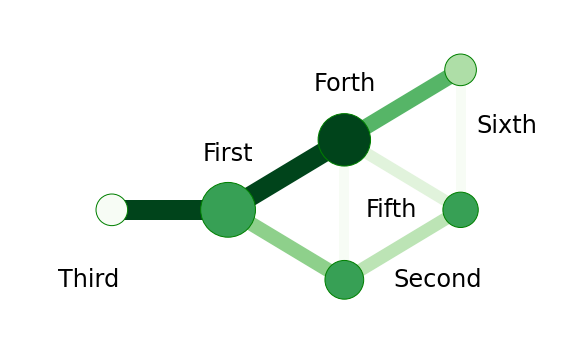

In [ ]:
# initialize the figure
fig, ax = plt.subplots(figsize=(10,10*0.618))
# First we need to normalize the betweenness - we copy so that we do not break the initial one
nbet_for_representation = nbet_l.copy()
min_final = 1000
max_final = 3000
min_initial = np.min(nbet_l)
max_initial = np.max(nbet_l)
range_values_initial = max_initial-min_initial
range_values_final = max_final-min_final
nbet_for_representation = (nbet_for_representation-min_initial)*range_values_final/range_values_initial + min_final

# plot everything
nx.draw_networkx(g, with_labels=False, pos=v_coord, node_size = nbet_for_representation, 
                 node_color = deg_1, cmap=plt.cm.Greens, edgecolors = "green",  width = 5, ax=ax)
nx.draw_networkx_labels(g, l_coord, v_name, font_size=24, ax=ax)
nx.draw_networkx_edges(g, pos=v_coord, edge_color = ebet_1,  width=ebet_1, edge_cmap=plt.cm.Greens, ax=ax)

ax = plt.gca()
ax.margins(0.30)
plt.axis("off")
plt.show()